In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append('../../')
from utils.originalTimetableParsing import *
from utils.timetableVisual import *
mm = 1/25.4
plt.rcParams['font.family']= "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
plt.rcParams['mathtext.fontset']='cm'
plt.style.use('tableau-colorblind10')

In [3]:
# 按照嘉定公交选择对应的sheet下标（可供计算的sheet为第三个）
choiceSheet=2

rawdfTimetable=pd.read_excel('../../data/schedule/Road01.xls',sheet_name=choiceSheet)
# utils.originalTimetableParsing.chooseIndexFromOrigin  从原始时刻表中选择可以解析的区域
df1=chooseIndexFromOrigin(rawdfTimetable)
# utils.originalTimetableParsing.splitTimetale 从解析区域中选择 weekend和weekday之间的区域
df_weekday,df_weekend=splitTimetable(df1)
# 返回新的timetable 和runningTimeArray 的解析
timetableChain,runningTimeArray=reshapeTimeTable(df_weekday)

In [4]:
# 由此得到departure time
timetableArray,departureTime,headway=formatTimetaleArray(timetableChain,runningTimeArray)
# 由此得到running time
runningPoint,runningTime=formatTurnningTime(departureTime)

In [5]:
timetableChain=timetableChainFill(timetableChain)

In [6]:
print(timetableChain)

                  Unnamed: 2 Unnamed: 4 Unnamed: 6 Unnamed: 8 Unnamed: 10   
嘉 定 1 路 行 车 时 刻 表                                                           
路牌                         北         新城          北         新城           北  \
1                   04:50:00   05:45:00   06:50:00   08:20:00    09:45:00   
2                   05:10:00   06:00:00   07:00:00   08:40:00    09:55:00   
3                         -2         -2   07:20:00   09:00:00    10:25:00   
4                         -2         -2   07:10:00   08:50:00    10:15:00   
5                         -2         -2   07:05:00   08:30:00    10:05:00   
6                   05:25:00   06:15:00   07:30:00   09:08:00    10:35:00   
7                         -2         -2   07:45:00   09:16:00    10:45:00   
8                   05:40:00   06:30:00   08:00:00   09:24:00          -3   
9                   05:50:00   06:45:00   08:15:00   09:32:00    10:55:00   
10                  06:00:00   07:00:00   08:30:00   09:40:00    11:10:00   

## distribution of headway and running time

In [7]:
print(turning_point)
print(turning_time)

NameError: name 'turning_point' is not defined

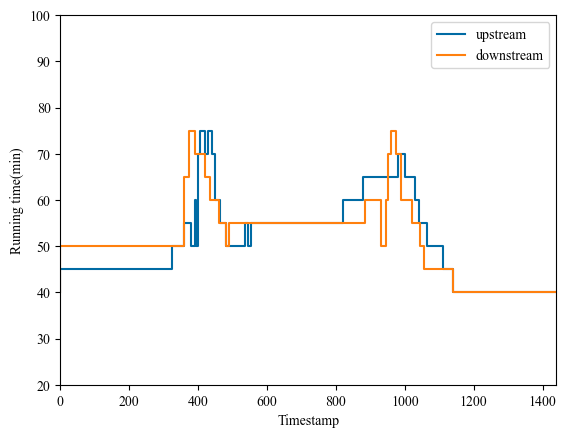

In [8]:
import copy
plt.figure()
# point 和time的修正
turning_point = copy.deepcopy(runningPoint)
turning_time = copy.deepcopy(runningTime)
for i in range(2):
    turning_point[i].insert(0,0)
    turning_time[i].insert(0,turning_time[i][0])
    turning_point[i].append(2000)
    turning_time[i].append(turning_time[i][-1])
    turning_time[i].append(turning_time[i][-1])
for i in range(2):
    plt.step(turning_point[i],turning_time[i])
plt.ylabel('Running time(min)')
plt.xlim(0,1440)
plt.ylim(20,100)
plt.xlabel('Timestamp')
plt.legend(['upstream','downstream'])
plt.show()

[[20, 20, 15, 15, 10, 10, 10, 10, 10, 5, 5, 5, 5, 10, 5, 5, 10, 10, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20], [15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 30, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 5, 10, 15, 15, 15, 15, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]]
[[0, 290, 310, 325, 340, 350, 360, 370, 380, 390, 395, 400, 405, 410, 420, 425, 430, 440, 450, 465, 480, 495, 510, 525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645, 655, 670, 685, 700, 715, 730, 745, 760, 775, 790, 805, 820, 835, 850, 865, 880, 895, 910, 925, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1065, 1080

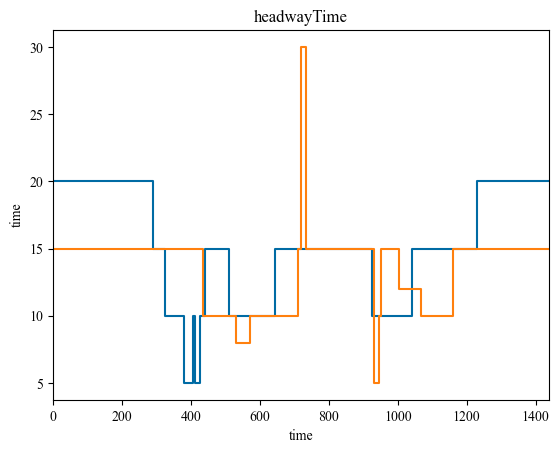

In [9]:
def departureTime2Headway(departureTime):
    ''' 
    返回headway和headway time
    '''
    depTimeDF=pd.DataFrame(departureTime)
    # upstream
    upDepTimeDF=depTimeDF[depTimeDF.iloc[:,2]==0]
    # downstream
    downDepTimeDF=depTimeDF[depTimeDF.iloc[:,2]==1]
    upHeaadwayPoint=list(upDepTimeDF.iloc[:,0].sort_values())
    upHeaadwayTime=[upHeaadwayPoint[i+1] - upHeaadwayPoint[i] for i in range(len(upHeaadwayPoint)-1)]
    downHeadwayPoint=list(downDepTimeDF.iloc[:,0].sort_values())
    downHeadwayTime=[downHeadwayPoint[i+1] - downHeadwayPoint[i] for i in range(len(downHeadwayPoint)-1)]
    return [upHeaadwayPoint,downHeadwayPoint],[upHeaadwayTime,downHeadwayTime]

headwayPoint,headwayTime=departureTime2Headway(departureTime)

runningTimeView(headwayPoint,headwayTime,title='headwayTime')

## Meal time

(0.0, 1440.0)

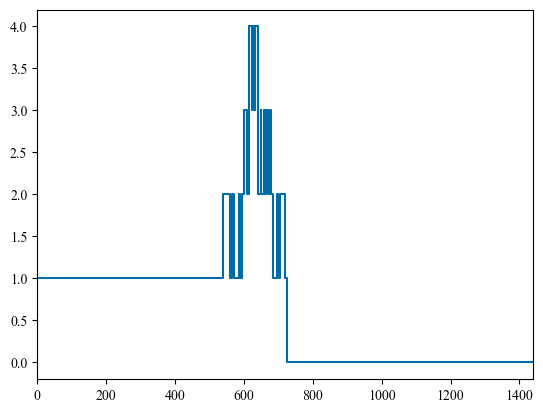

In [10]:
# 获取meal time
import copy
mealTimeList=[]
for driver in timetableArray:
    meal_time=[]
    for i in range(len(driver)-1):
        if driver[i+1][0]-driver[i][0] > 30+get_moment_direction(runningPoint,runningTime,driver[i][0],driver[i][1]):
            # 选用前面的时间点
            meal_time.append(driver[i][0]+get_moment_direction(runningPoint,runningTime,driver[i][0],driver[i][1])+10)
            meal_time.append(meal_time[-1]+25)
            break
    mealTimeList.append(copy.deepcopy(meal_time))

def countMealTime(mealTimeList):
    ''' 
    统计司机的吃饭时间和对应的数量

    args:
    mealTimeList:吃饭时间[[i,o],[i,o],...]

    return:
    mealIntervals:分段的时间
    mealCount:分段的数量
    '''
    inputTime=[d[0] for d in mealTimeList]
    outputTime=[d[1] for d in mealTimeList]
    inputTime.sort()
    outputTime.sort()
    # 排序之后开始counting
    mealIntervals=[0]
    mealCount=[0]
    while inputTime and outputTime:
        if min(inputTime[0],outputTime[0]) ==  inputTime[0]:
            # 如果现在是增加
            mealIntervals.append(inputTime.pop(0))
            mealCount.append(mealCount[-1]+1)
        else:
            # 限制是离开
            mealIntervals.append(outputTime.pop(0))
            mealCount.append(mealCount[-1]-1)
    while(outputTime):
        mealIntervals.append(outputTime.pop(0))
        mealCount.append(mealCount[-1]-1)
    return mealIntervals,mealCount
a,b=countMealTime(mealTimeList)
a.insert(0,0)
b.insert(0,0)
a.append(1440)
b.append(0)
plt.step(a,b)
plt.xlim(0,1440)

## Driver Work Mode

Text(74.44444444444444, 0.5, 'Driver index')

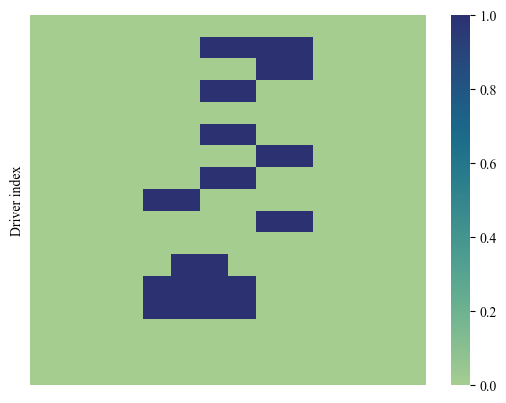

In [11]:
import seaborn as sns
sns.heatmap(timetableChain==-3,
            cmap='crest',
            xticklabels='',
            yticklabels='',
            )
plt.ylabel('Driver index')

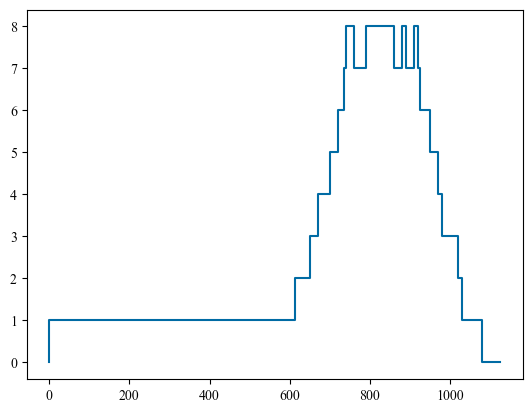

In [12]:
def datetime2int(time):
    return time.hour*60+time.minute
def workmodeTimeFromTimetableChain(timetableChain):
    ''' 
    获取司机两头班的开始时间和结束时间

    input:
    timetableChain: 原始时刻表解析的dataframe格式,填充-1下班 -2上班 -3两头班

    return:
    workmodeList:workmode list
    '''
    workmodeList=[]
    for i in range(1,len(timetableChain)):
        workmode=[]
        flag=1
        for j in range(len(timetableChain.iloc[i,:])):
            # 对于每一行
            if timetableChain.iloc[i,j]==-3 and flag==1:
                workmode.append(datetime2int(timetableChain.iloc[i,j-1])+get_moment_direction(runningPoint,runningTime,datetime2int(timetableChain.iloc[i,j-1]),1))
                flag=0
            if timetableChain.iloc[i,j]!=-3 and flag==0:
                workmode.append(datetime2int(timetableChain.iloc[i,j]))
                flag=1
        if workmode:
            workmodeList.append(copy.deepcopy(workmode))
    return workmodeList
workmodeList=workmodeTimeFromTimetableChain(timetableChain)
a,b=countMealTime(workmodeList)
plt.step(a,b)
